1] RSI

2] Stochastic Oscillator

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/OMF_data_final/uploaded_data_2/Dataset_2_csv.csv')
df = df[df.columns[1:]]
df = df.iloc[::-1]

In [ ]:
prices = df.to_numpy()
return_rate = (prices[1:] - prices[:-1])/prices[:-1]

In [ ]:
window = 30
num_days = len(df.index)
num_companies = df.columns.size
total_rows = num_days - window + 1

In [ ]:
lr = 0.1
num_epochs = 20
beta = 0.23

In [ ]:
w_0_23_df = pd.read_csv('/content/drive/MyDrive/Weights without transaction cost/Weights with 0_23 beta')
w_0_23_df = w_0_23_df[:-1]
w_0_23_df = w_0_23_df.iloc[:,1:]
w_0_23 = w_0_23_df.to_numpy()

### **RSI Indicator integrated with the given method:**

Mathematically, there are several ways to integrate them. We focus primarily on 2 ideas.

1) Buying and selling only when both the indicators agree. i.e., if weight from DLP is +ve and indicator < 30 buy only then and similarly for selling with weight -ve and indicator >70.

2) Not buying or selling only when both the indicators totally disagree. i.e., buy if DLP is +ve and indicator < 70 and sell if DLP is -ve and indicator is >30.

3) Invest all the money in +ve weights proportional to weights.


**Finding RSI:**

In [ ]:
rsi_ind = []
for i in range(window, total_rows):
  rsi_for_row = []
  rsi_num_days = 14
  for assets in  range(num_companies):
    avg_gain = 0
    avg_loss = 0
    for j in range(i-rsi_num_days,i):
      if return_rate[j][assets] > 0:
        avg_gain += return_rate[j][assets]
      else:
        avg_loss += abs(return_rate[j][assets])
    avg_gain /= rsi_num_days
    avg_loss /= rsi_num_days
    rs = math.inf
    if avg_loss != 0:
      rs = avg_gain/avg_loss
    rsi_of_asset = 100 - (100/(1+rs))
    rsi_for_row.append(rsi_of_asset)
  rsi_ind.append(rsi_for_row)

**Integrating:**

In [ ]:
# Approach 1
weights_rsi_1 = []
weight_rsi_uninvested_1 = []
for i in range(window, total_rows):
  cur_w = w_0_23[i-window]
  final_w = []
  uninv_w = 0
  for j in range(num_companies):
    if cur_w[j] > 0 and rsi_ind[i-window][j] < 30:
      final_w.append(cur_w[j])
    elif cur_w[j] < 0 and rsi_ind[i-window][j] > 70:
      final_w.append(cur_w[j])
    else:
      final_w.append(0)
      uninv_w += cur_w[j]
  weights_rsi_1.append(final_w)
  weight_rsi_uninvested_1.append(uninv_w)
weights_rsi_1 = np.array(weights_rsi_1)

In [ ]:
# Approach 2
weights_rsi_2 = []
weight_rsi_uninvested_2 = []
for i in range(window, total_rows):
  cur_w = w_0_23[i-window]
  final_w = []
  uninv_w = 0
  for j in range(num_companies):
    if cur_w[j] > 0 and rsi_ind[i-window][j] < 50:
      final_w.append(cur_w[j])
    elif cur_w[j] < 0 and rsi_ind[i-window][j] > 50:
      final_w.append(cur_w[j])
    else:
      final_w.append(0)
      uninv_w += cur_w[j]
  weights_rsi_2.append(final_w)
  weight_rsi_uninvested_2.append(uninv_w)
weights_rsi_2 = np.array(weights_rsi_2)

In [ ]:
# Approach 3
weights_rsi_3 = []
# weight_rsi_uninvested_3 = []
for i in range(window, total_rows):
  cur_w = w_0_23[i-window]
  final_w = []
  uninv_w = 0
  for j in range(num_companies):
    if cur_w[j] > 0 and rsi_ind[i-window][j] < 30:
      final_w.append(cur_w[j])
    else:
      final_w.append(0)
  sfw = sum(final_w)
  if (sfw == 0):
    sfw = 1
  for j in range(num_companies):
    final_w[j] = final_w[j]/sfw
  weights_rsi_3.append(final_w)
  # weight_rsi_uninvested_1.append(uninv_w)
weights_rsi_3 = np.array(weights_rsi_3)

**Actual Returns Comparision:**

In [ ]:
return_w_0_23 = []
return_app_1 = []
return_app_2 = []
return_app_3 = []
day = []

In [ ]:
for i in range(window, total_rows):
  r_0_23 = w_0_23[i-window]@return_rate[i]
  r_app_1 = weights_rsi_1[i-window]@return_rate[i]
  r_app_2 = weights_rsi_2[i-window]@return_rate[i]
  r_app_3 = weights_rsi_3[i-window]@return_rate[i]

  return_w_0_23.append(r_0_23)
  return_app_1.append(r_app_1)
  return_app_2.append(r_app_2)
  return_app_3.append(r_app_3)

  day.append(i-window+1)

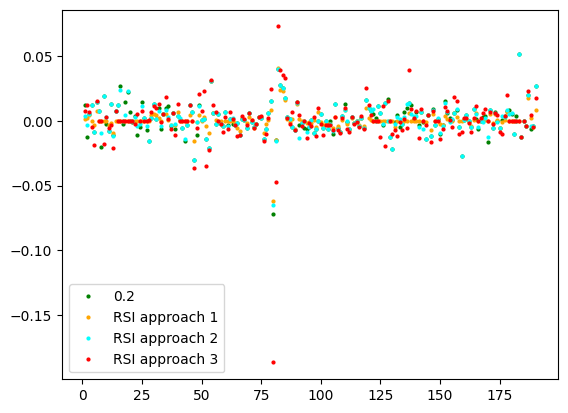

In [ ]:
plt.plot(day,return_w_0_23, 'o', markersize = 2, label='0.2', color='green')
plt.plot(day,return_app_1, 'o', markersize = 2, label='RSI approach 1', color='orange')
plt.plot(day,return_app_2, 'o', markersize = 2, label='RSI approach 2', color='cyan')
plt.plot(day,return_app_3, 'o', markersize = 2, label='RSI approach 3', color='red')
plt.legend()
plt.show()

In [ ]:
print(sum(return_w_0_23))
print(sum(return_app_1))
print(sum(return_app_2))
print(sum(return_app_3))

0.25414019881849037
0.09925234715686254
0.24080115771161448
0.07469423651188026


In [ ]:
neg_0_23 = 0
neg_app_1 = 0
neg_app_2 = 0
neg_app_3 = 0

for ret in return_w_0_23:
  if ret < 0:
    neg_0_23 += ret
for ret in return_app_1:
  if ret < 0:
    neg_app_1 += ret
for ret in return_app_2:
  if ret < 0:
    neg_app_2 += ret
for ret in return_app_3:
  if ret < 0:
    neg_app_3 += ret

print(neg_0_23)
print(neg_app_1)
print(neg_app_2)
print(neg_app_3)

-0.6716155110029504
-0.28526515267705066
-0.6098428820865662
-0.8235731027861165


###**Stochastic Oscillator:**

Mathematically, there are several ways to integrate them. We focus primarily on 2 ideas.

1) Buying and selling only when both the indicators agree. i.e., if weight from DLP is +ve and indicator < 20 buy only then and similarly for selling with weight -ve and indicator >80.

2) Not buying or selling only when both the indicators totally disagree. i.e., buy if DLP is +ve and indicator < 80 and sell if DLP is -ve and indicator is >20.

**Indicator Calculation:**

In [ ]:
so_ind = []
for i in range(window+1, total_rows+1):
  so_for_row = []
  so_num_days = 14
  for assets in range(num_companies):
    c = prices[i][j]
    l_val = min(prices[i-so_num_days:i, j])
    h_val = max(prices[i-so_num_days:i, j])
    temp = ((c - l_val)*100)/(h_val - l_val)
    if temp < 0:
      temp = 0
    so_for_row.append(temp)
  so_ind.append(so_for_row)

**Integrating:**

In [ ]:
# Approach 1
weights_so_1 = []
weight_so_uninvested_1 = []
for i in range(window, total_rows):
  cur_w = w_0_23[i-window]
  final_w = []
  uninv_w = 0
  for j in range(num_companies):
    if cur_w[j] > 0 and so_ind[i-window][j] < 20:
      final_w.append(cur_w[j])
    elif cur_w[j] < 0 and so_ind[i-window][j] > 80:
      final_w.append(cur_w[j])
    else:
      final_w.append(0)
      uninv_w += cur_w[j]
  weights_so_1.append(final_w)
  weight_so_uninvested_1.append(uninv_w)
weights_so_1 = np.array(weights_so_1)

In [ ]:
# Approach 2
weights_so_2 = []
weight_so_uninvested_2 = []
for i in range(window, total_rows):
  cur_w = w_0_23[i-window]
  final_w = []
  uninv_w = 0
  for j in range(num_companies):
    if cur_w[j] > 0 and so_ind[i-window][j] < 80:
      final_w.append(cur_w[j])
    elif cur_w[j] < 0 and so_ind[i-window][j] > 20:
      final_w.append(cur_w[j])
    else:
      final_w.append(0)
      uninv_w += cur_w[j]
  weights_so_2.append(final_w)
  weight_so_uninvested_2.append(uninv_w)
weights_so_2 = np.array(weights_so_2)

In [ ]:
# Approach 3
weights_so_3 = []
# weight_so_uninvested_1 = []
for i in range(window, total_rows):
  cur_w = w_0_23[i-window]
  final_w = []
  uninv_w = 0
  for j in range(num_companies):
    if cur_w[j] > 0 and so_ind[i-window][j] < 20:
      final_w.append(cur_w[j])
    else:
      final_w.append(0)
  sfw = sum(final_w)
  if sfw == 0:
    sfw = 1
  for j in range(num_companies):
    final_w[j] /= sfw
  weights_so_3.append(final_w)
  # weight_so_uninvested_1.append(uninv_w)
weights_so_3 = np.array(weights_so_3)

**Actual Returns Comparison:**

In [ ]:
return_so_app_1 = []
return_so_app_2 = []
return_so_app_3 = []

In [ ]:
for i in range(window, total_rows):
  r_app_1 = weights_so_1[i-window]@return_rate[i]
  r_app_2 = weights_so_2[i-window]@return_rate[i]
  r_app_3 = weights_so_3[i-window]@return_rate[i]

  return_so_app_1.append(r_app_1)
  return_so_app_2.append(r_app_2)
  return_so_app_3.append(r_app_3)

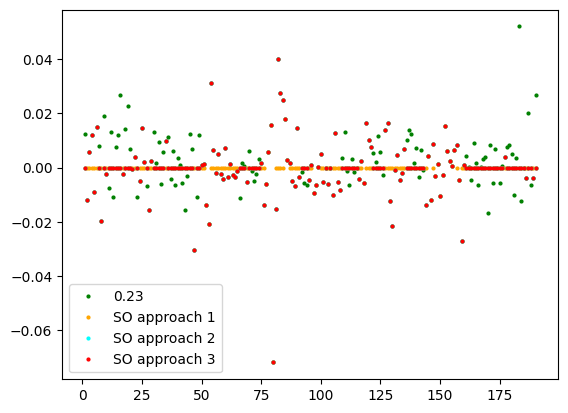

In [ ]:
plt.plot(day,return_w_0_23, 'o', markersize = 2, label='0.23', color='green')
plt.plot(day,return_so_app_1, 'o', markersize = 2, label='SO approach 1', color='orange')
plt.plot(day,return_so_app_2, 'o', markersize = 2, label='SO approach 2', color='cyan')
plt.plot(day,return_so_app_2, 'o', markersize = 2, label='SO approach 3', color='red')
plt.legend()
plt.show()

In [ ]:
print(sum(return_w_0_23))
print(sum(return_so_app_1))
print(sum(return_so_app_2))
print(sum(return_so_app_3))

0.25414019881849037
-0.08749016539221555
-0.038050119379809975
-0.08749016092344768


In [ ]:
neg_0_23 = 0
neg_app_1 = 0
neg_app_2 = 0
neg_app_3 = 0

for ret in return_w_0_23:
  if ret < 0:
    neg_0_23 += ret
for ret in return_so_app_1:
  if ret < 0:
    neg_app_1 += ret
for ret in return_so_app_2:
  if ret < 0:
    neg_app_2 += ret
for ret in return_so_app_3:
  if ret < 0:
    neg_app_3 += ret

print(neg_0_23)
print(neg_app_1)
print(neg_app_2)
print(neg_app_3)

-0.6716155110029504
-0.16643724025439308
-0.4663783125671639
-0.1664372354824362


In [ ]:
## Optimization for Data Analysis - Stephen J Wright
## Multi-gradient descent for multi objective recommender system - N Milojkovic

## BFGS